### Importacion de librerias y dataset

In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = "../../datos/procesados/limpieza01_argentina_delitos.csv" #Ruta del dataset limpio
datos = datos = pd.read_csv(path)
datos

## Escalamiento

### Escala en función del mínimo y máximo

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Separar características numéricas y categóricas
numeric_features = datos.select_dtypes(include=['int', 'float']).columns

# Escalamiento de características numéricas
scaler = MinMaxScaler()
scaled_data = datos.copy()
scaled_data[numeric_features] = scaler.fit_transform(datos[numeric_features])

In [28]:
# convierte vectores de numpy a DataFrames para graficarlos
datos_escalados = pd.DataFrame(scaled_data, columns=datos.columns)

In [29]:
datos_escalados

Id_hecho         provincia         localidad  anio       mes  \
0      0.000000           NEUQUEN          Plottier   0.0  0.000000   
1      0.000000           NEUQUEN          Plottier   0.0  0.000000   
2      0.000000           NEUQUEN          Plottier   0.0  0.000000   
3      0.000000           NEUQUEN          Plottier   0.0  0.000000   
4      0.000060           NEUQUEN         Cutral Có   0.0  0.000000   
...         ...               ...               ...   ...       ...   
25155  0.991989      BUENOS AIRES  Florencio Varela   1.0  0.909091   
25156  0.999402  TIERRA DEL FUEGO           Ushuaia   1.0  0.545455   
25157  0.999402  TIERRA DEL FUEGO           Ushuaia   1.0  0.545455   
25158  1.000000        ENTRE RIOS         Concordia   0.0  1.000000   
25159  1.000000        ENTRE RIOS         Concordia   0.0  1.000000   

                 tipo_lugar   tipo_lugar_ampliado motivo_origen_registro  \
0      Domicilio particular  Domicilio particular  Intervención policial   
1      Domicilio particular  Domicilio particular  Intervención policial   
2      Domicilio particular  Domicilio particular  Intervención policial   
3      Domicilio particular  Domicilio particular  Intervención policial   
4               Vía pública           Vía pública  Intervención policial   
...                     ...                   ...                    ...   
25155           Vía pública           Vía pública  Intervención policial   
25156  Domicilio particular  Domicilio particular  Intervención policial   
25157  Domicilio particular  Domicilio particular  Intervención policial   
25158           Vía pública           Vía pública  Intervención policial   
25159           Vía pública           Vía pública  Intervención policial   

      fecha_hecho hora_hecho            tipo_persona_id tipo_persona  \
0       14/1/2017   22:38:00  Imputado idRegistro 12929     Imputado   
1       14/1/2017   22:38:00  Imputado idRegistro 12930     Imputado   
2       14/1/2017   22:38:00  Imputado idRegistro 12931     Imputado   
3       14/1/2017   22:38:00   Víctima idRegistro 12235      Víctima   
4        7/1/2017   10:35:00  Imputado idRegistro 12932     Imputado   
...           ...        ...                        ...          ...   
25155  10/11/2021   11:11:11   Víctima idRegistro 29888      Víctima   
25156    4/7/2021   12:00:00  Imputado idRegistro 32993     Imputado   
25157    4/7/2021   12:00:00   Víctima idRegistro 30020      Víctima   
25158  25/12/2017   11:11:11  Imputado idRegistro 33004     Imputado   
25159  25/12/2017   11:11:11   Víctima idRegistro 30031      Víctima   

         sexo_victima tr_edad_victima   clase_victima  sexo_inculpado  \
0      No corresponde  No corresponde  No corresponde       Masculino   
1      No corresponde  No corresponde  No corresponde       Masculino   
2      No corresponde  No corresponde  No corresponde       Masculino   
3           Masculino           45-49           Civil  No corresponde   
4      No corresponde  No corresponde  No corresponde       Masculino   
...               ...             ...             ...             ...   
25155       Masculino           45-49           Civil  No corresponde   
25156  No corresponde  No corresponde  No corresponde        Femenino   
25157       Masculino           25-29           Civil  No corresponde   
25158  No corresponde  No corresponde  No corresponde       Masculino   
25159       Masculino           35-39           Civil  No corresponde   

      tr_edad_inculpado relacion_inculpado_victima  \
0        Sin determinar               Sin relación   
1        Sin determinar               Sin relación   
2        Sin determinar               Sin relación   
3        No corresponde             No corresponde   
4                 30-34               Sin relación   
...                 ...                        ...   
25155    No corresponde             No corresponde   
25156             25-29            Conyuge/ pareja   
25157    No c

## Codificacion de datos categoricos

In [30]:
#Observacion de los tipos de datos por columna, con el fin de encontrar aquellas con datos categoricos/object
print(datos.dtypes)

Id_hecho                       int64
provincia                     object
localidad                     object
anio                           int64
mes                            int64
tipo_lugar                    object
tipo_lugar_ampliado           object
motivo_origen_registro        object
fecha_hecho                   object
hora_hecho                    object
tipo_persona_id               object
tipo_persona                  object
sexo_victima                  object
tr_edad_victima               object
clase_victima                 object
sexo_inculpado                object
tr_edad_inculpado             object
relacion_inculpado_victima    object
relacion_victima_inculpado    object
cant_vic                       int64
dtype: object


### Categoricos ordinales

In [ ]:
##No hay 

### Categoricos nominales

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Seleccionar las columnas de tipo object
object_columns = datos_escalados.select_dtypes(include=['object']).columns.copy()

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in object_columns:
    encoder = LabelEncoder()
    datos_escalados[column] = encoder.fit_transform(datos_escalados[column].astype(str))

In [36]:
datos_escalados

Id_hecho  provincia  localidad  anio       mes  tipo_lugar  \
0      0.000000         14        616   0.0  0.000000           2   
1      0.000000         14        616   0.0  0.000000           2   
2      0.000000         14        616   0.0  0.000000           2   
3      0.000000         14        616   0.0  0.000000           2   
4      0.000060         14        231   0.0  0.000000           6   
...         ...        ...        ...   ...       ...         ...   
25155  0.991989          0        298   1.0  0.909091           6   
25156  0.999402         22        845   1.0  0.545455           2   
25157  0.999402         22        845   1.0  0.545455           2   
25158  1.000000          7        206   0.0  1.000000           6   
25159  1.000000          7        206   0.0  1.000000           6   

       tipo_lugar_ampliado  motivo_origen_registro  fecha_hecho  hora_hecho  \
0                       11                       1          298         785   
1                       11                       1          298         785   
2                       11                       1          298         785   
3                       11                       1          298         785   
4                       22                       1         1632         368   
...                    ...                     ...          ...         ...   
25155                   22                       1           73         385   
25156                   11                       1         1502         410   
25157                   11                       1         1502         410   
25158                   22                       1         1028         385   
25159                   22                       1         1028         385   

       tipo_persona_id  tipo_persona  sexo_victima  tr_edad_victima  \
0                    0             0             2               19   
1                    1             0             2               19   
2                    2             0             2               19   
3                13646             1             1                8   
4                    3             0             2               19   
...                ...           ...           ...              ...   
25155            25137             1             1                8   
25156            13571             0             2               19   
25157            25141             1             1                3   
25158            13573             0             2               19   
25159            25142             1             1                5   

       clase_victima  sexo_inculpado  tr_edad_inculpado  \
0                  2               1                 19   
1                  2               1                 19   
2                  2               1                 19   
3                  0               2                 18   
4                  2               1                  4   
...              ...             ...                ...   
25155              0               2                 18   
25156              2               0                  3   
25157              0               2                 18   
25158              2               1                  4   
25159              0               2                 18   

       relacion_inculpado_victima  relacion_victima_inculpado  cant_vic  
0                              12                           7       0.0  
1                              12                           7       0.0  
2                              12                           7       0.0  
3                               7                          12       0.0  
4                              12                           7       0.0  
...                           ...                         ...       ...  
25155                           7                           8       0.0  
25156                           1                           7       0.0  
2

In [37]:
datos_escalados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id_hecho                    25160 non-null  float64
 1   provincia                   25160 non-null  int64  
 2   localidad                   25160 non-null  int64  
 3   anio                        25160 non-null  float64
 4   mes                         25160 non-null  float64
 5   tipo_lugar                  25160 non-null  int64  
 6   tipo_lugar_ampliado         25160 non-null  int64  
 7   motivo_origen_registro      25160 non-null  int64  
 8   fecha_hecho                 25160 non-null  int64  
 9   hora_hecho                  25160 non-null  int64  
 10  tipo_persona_id             25160 non-null  int64  
 11  tipo_persona                25160 non-null  int64  
 12  sexo_victima                25160 non-null  int64  
 13  tr_edad_victima             251

## Estadisticas


### Medidas de tendencia central y dispersión

In [39]:
datos_escalados.describe()

Id_hecho     provincia     localidad          anio           mes  \
count  25160.000000  25160.000000  25160.000000  25160.000000  25160.000000   
mean       0.498907      7.843482    488.042766      0.501242      0.495328   
std        0.275832      8.492299    238.780273      0.347967      0.323371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.270609      0.000000    293.000000      0.250000      0.181818   
50%        0.500897      4.000000    515.000000      0.500000      0.454545   
75%        0.723697     16.000000    678.000000      0.750000      0.818182   
max        1.000000     23.000000    930.000000      1.000000      1.000000   

         tipo_lugar  tipo_lugar_ampliado  motivo_origen_registro  \
count  25160.000000         25160.000000            25160.000000   
mean       4.443442            17.746184                0.713076   
std        1.870160             5.512500                0.517268   
min        0.000000             0.000000                0.000000   
25%        2.000000            11.000000                0.000000   
50%        6.000000            22.000000                1.000000   
75%        6.000000            22.000000                1.000000   
max        6.000000            22.000000                3.000000   

        fecha_hecho    hora_hecho  tipo_persona_id  tipo_persona  \
count  25160.000000  25160.000000     25160.000000  25160.000000   
mean     901.012242    406.731797     12579.500000      0.457631   
std      528.268707    199.175513      7263.210723      0.498212   
min        0.000000      0.000000         0.000000      0.000000   
25%      439.000000    352.000000      6289.750000      0.000000   
50%      905.000000    385.000000     12579.500000      0.000000   
75%     1357.000000    506.000000     18869.250000      1.000000   
max     1809.000000    842.000000     25159.000000      1.000000   

       sexo_victima  tr_edad_victima  clase_victima  sexo_inculpado  \
count  25160.000000     25160.000000   25160.000000    25160.000000   
mean       1.467806        12.857830       1.221224        1.643720   
std        0.632088         7.355228       1.313595        0.720052   
min        0.000000         0.000000       0.000000        0.000000   
25%        1.000000         4.000000       0.000000        1.000000   
50%        2.000000        19.000000       2.000000        2.000000   
75%        2.000000        19.000000       2.000000        2.000000   
max        3.000000        20.000000       9.000000        3.000000   

       tr_edad_inculpado  relacion_inculpado_victima  \
count       25160.000000                25160.000000   
mean           13.286804                    8.515620   
std             7.090716                    2.536978   
min             0.000000                    0.000000   
25%             5.000000                    7.000000   
50%            18.000000                    7.000000   
75%            18.000000                   11.000000   
max            19.000000                   13.000000   

       relacion_victima_inculpado      cant_vic  
count                25160.000000  25160.000000  
mean                     8.197377      0.013521  
std                      2.430265      0.067361  
min                      0.000000      0.000000  
25%                      7.000000      0.000000  
50%                      7.000000      0.000000  
75%                     11.000000      0.000000  
max                     13.000000      1.000000

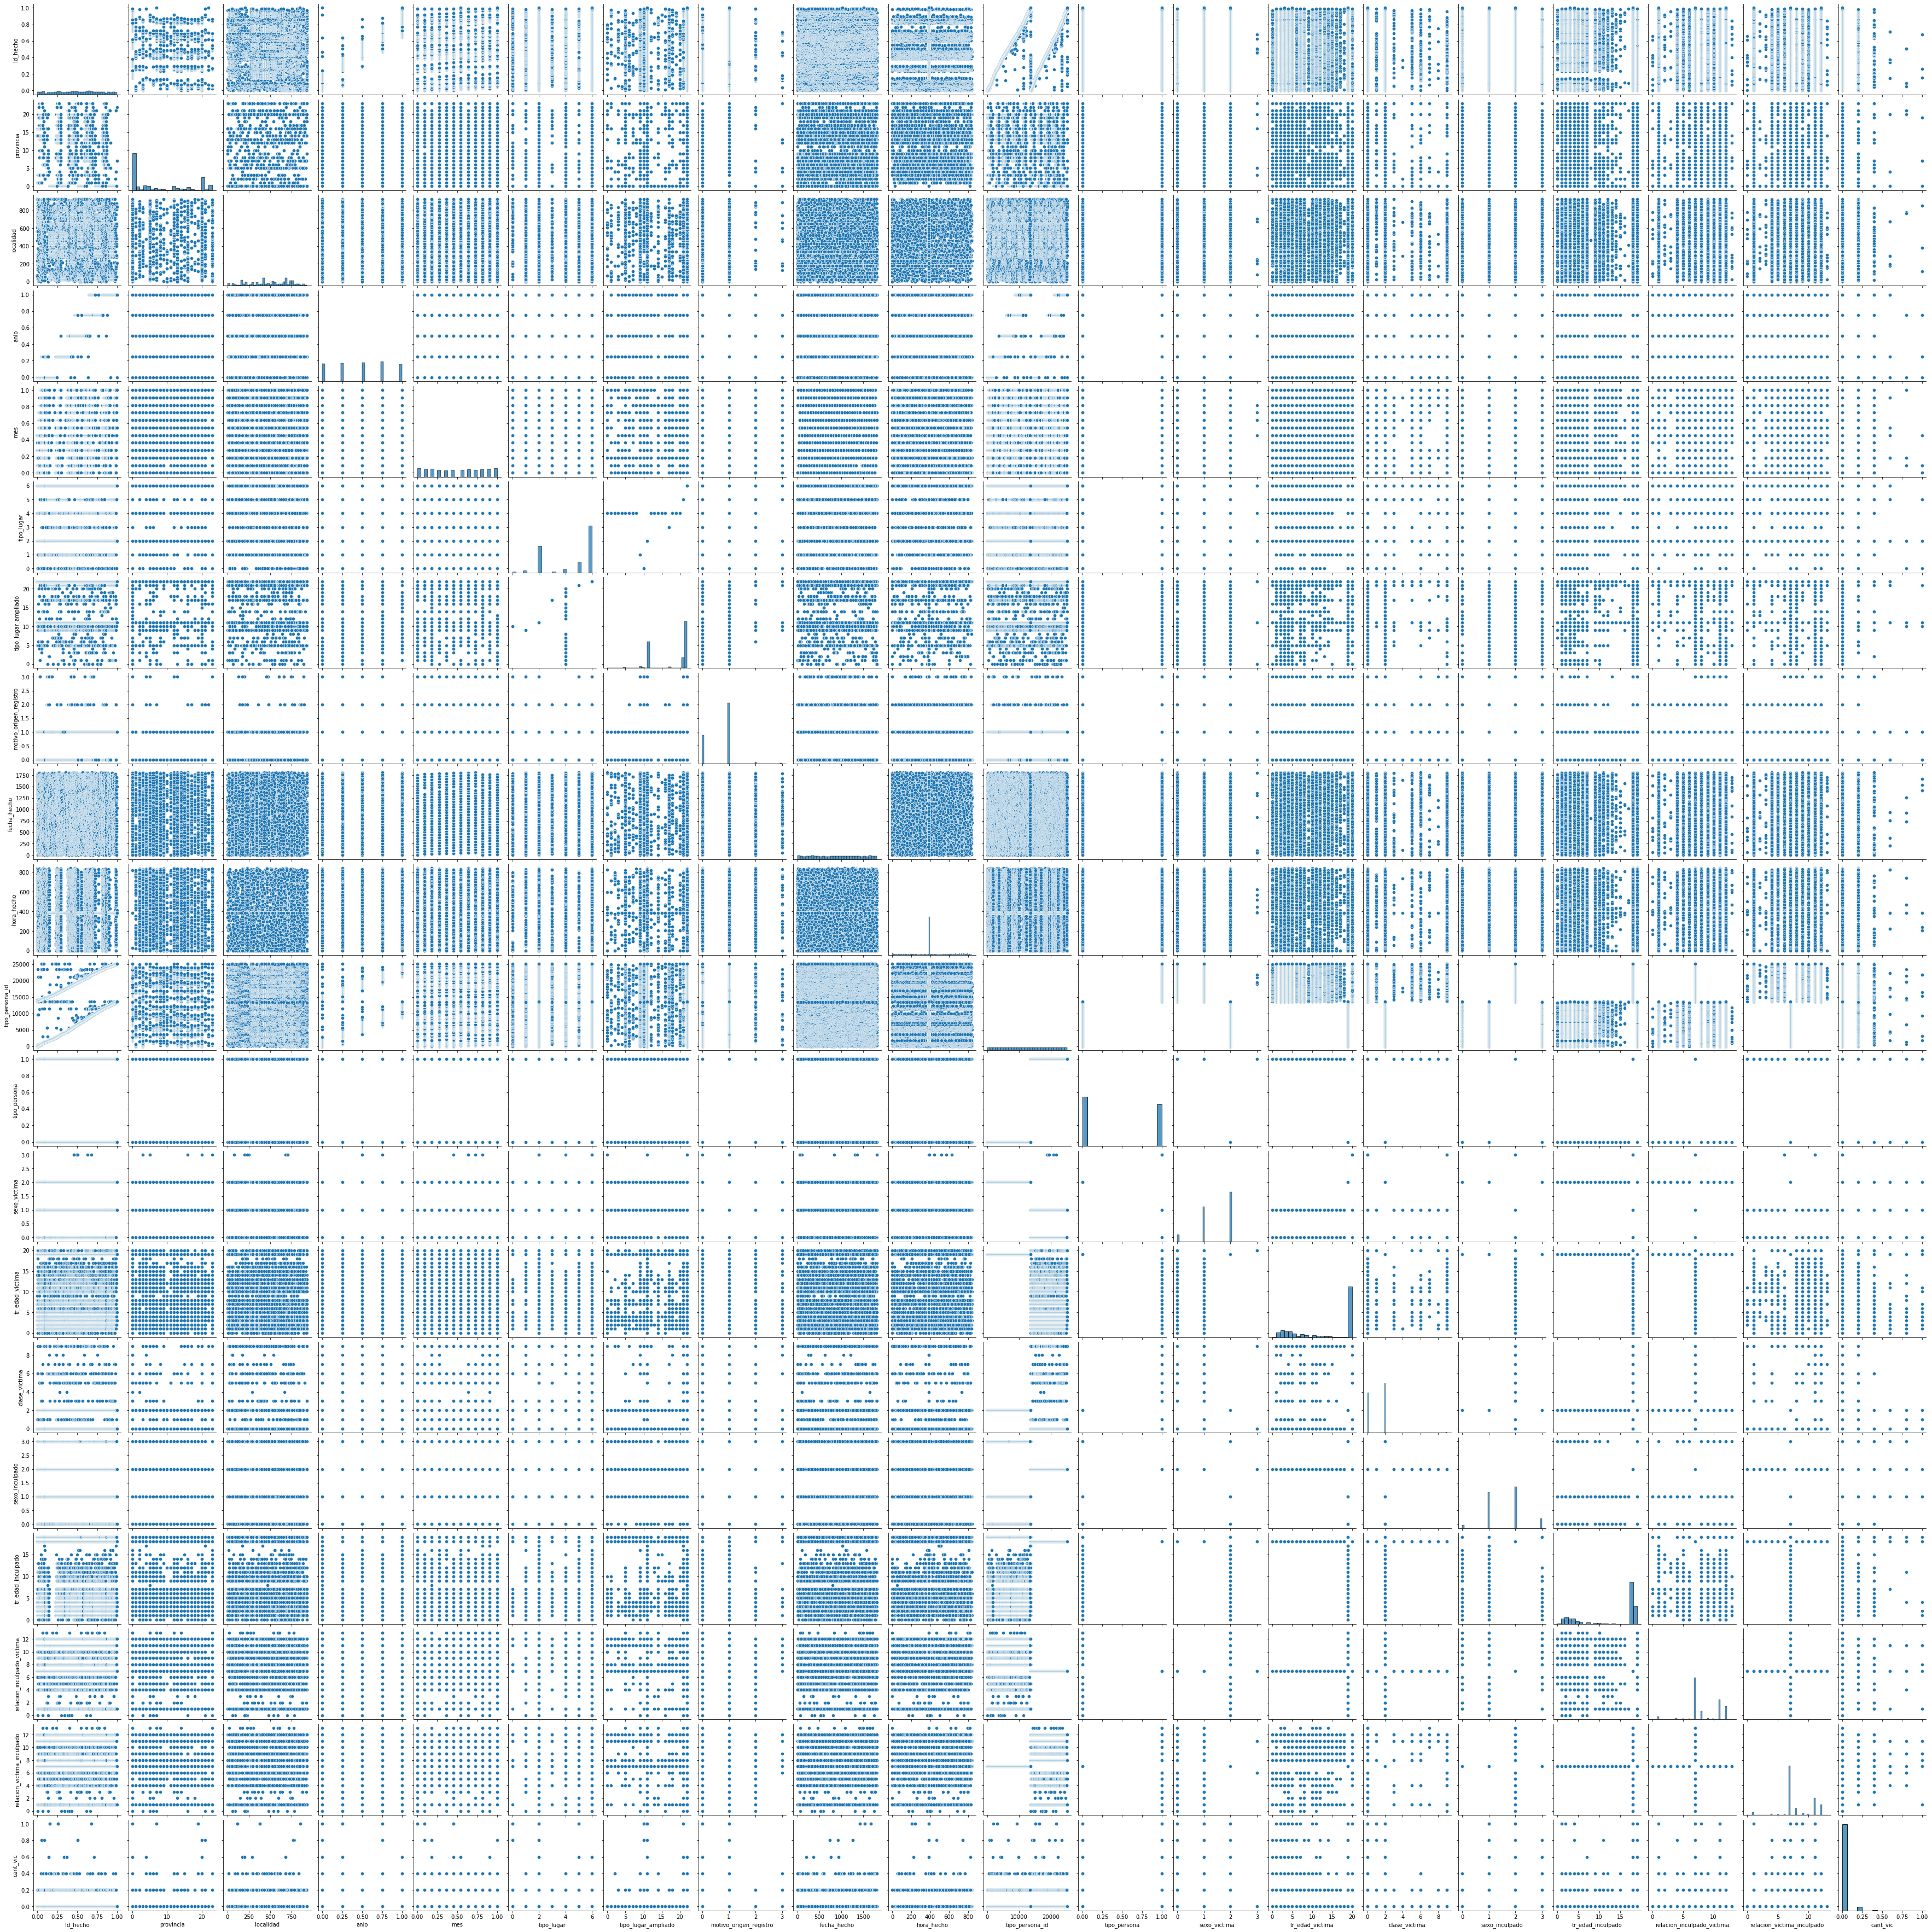

In [41]:
#Grafico de relacion entre columnas
sns.pairplot(data = datos_escalados)
plt.show()

### Datos anormales


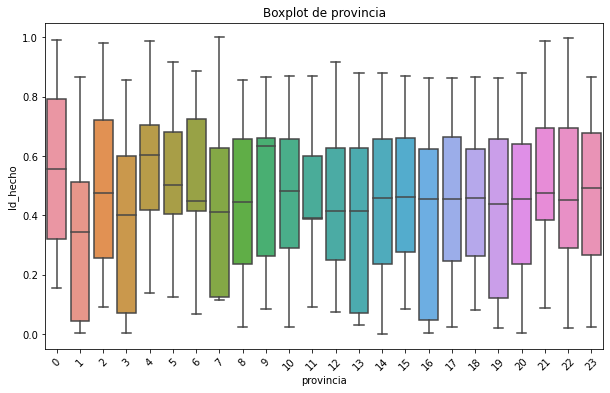

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


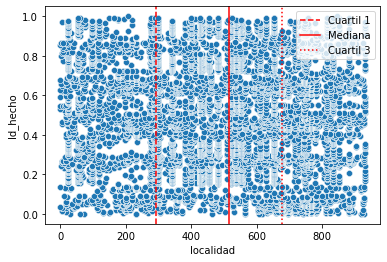

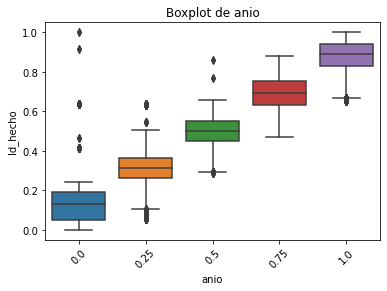

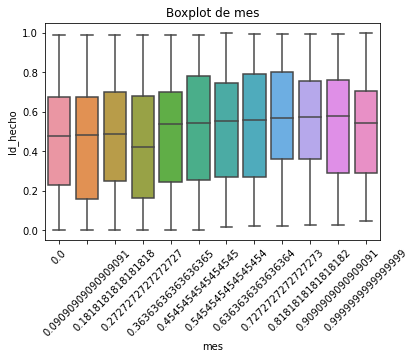

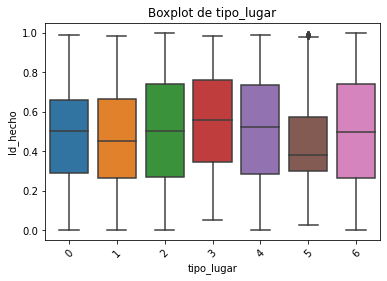

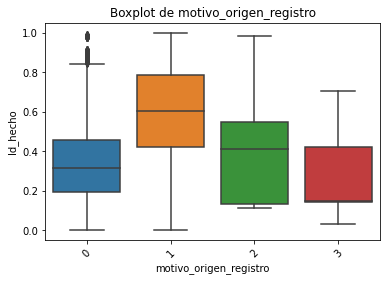

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


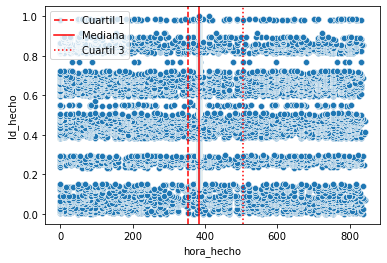

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f0cd7e89900> (for post_execute):


KeyboardInterrupt: 

In [70]:
# Configurar el tamaño de la figura
plt.figure(figsize=(18, 15))  
# Iterar sobre las columnas y crear un boxplot para cada una
for column in datos_escalados.columns:
    if column != 'Id_hecho' and column != 'localidad' and column != 'tipo_lugar_ampliado' and column != 'fecha_hecho' and column != 'hora_hecho':
        #Se utilizara la columna "Id_hecho" como constante a considerar en la evaluacion de la distribucion de los datos
        #Sobre el eje "x" ira la columna que se itere
        sns.boxplot(y = 'Id_hecho', x=column, data=datos_escalados)
        plt.title(f'Boxplot de {column}')
        #Se rotan las etiquetas sobre el eje "x" para evitar que se mezclen entre si
        plt.xticks(rotation=45)
        plt.show()
    elif column == 'localidad' or column == 'hora_hecho':
        # Crear el gráfico scatter con Seaborn
        sns.scatterplot(data=datos_escalados, x=column, y='Id_hecho')

        # Calcular los cuartiles
        quartiles = datos_escalados[column].quantile([0.25, 0.5, 0.75])

        # Agregar las líneas verticales para los cuartiles
        plt.axvline(x=quartiles[0.25], color='red', linestyle='--', label='Cuartil 1')
        plt.axvline(x=quartiles[0.5], color='red', linestyle='-', label='Mediana')
        plt.axvline(x=quartiles[0.75], color='red', linestyle=':', label='Cuartil 3')

        # Mostrar la leyenda
        plt.legend()

        # Mostrar el gráfico
        plt.show()

#### Revision de datos que se visualizaron mal

In [ ]:
datos.hora_hecho.unique()
datos.localidad.unique()

Se observo que algunas colmnas sobrepasaron los graficos: - localidad - hora_hecho, 

- Se creara graficos de dispersion a parte para la columna de localidad y hora_hecho (se procesara a un estandar de 48hs, estandarizando las horas y los minutos cada 30min)
- Se exluiran las columnas redundantes: - fecha_hecho y - otro_lugar_ampliado

## Relacion entre las variables

### Matriz de covarianza

In [50]:
matriz_cov = datos_escalados.cov()

In [54]:
matriz_cov

Id_hecho    provincia     localidad  \
Id_hecho                      0.076083    -0.420593     -3.742062   
provincia                    -0.420593    72.119147    686.062897   
localidad                    -3.742062   686.062897  57016.018840   
anio                          0.090643    -0.003482      1.295328   
mes                           0.009633     0.001581     -0.199309   
tipo_lugar                   -0.004451    -0.034410      0.741478   
tipo_lugar_ampliado          -0.026004    -1.745996      2.345566   
motivo_origen_registro        0.043300     0.905564     -0.903187   
fecha_hecho                   1.010813    19.771422   1339.476006   
hora_hecho                   -0.553793   108.929282   2023.353773   
tipo_persona_id             947.349694 -4982.758337 -52170.543305   
tipo_persona                 -0.003287     0.013162     -0.345141   
sexo_victima                  0.004800    -0.017957      0.658319   
tr_edad_victima               0.055181    -0.381449    -32.533806   
clase_victima                 0.000670    -0.074877     -4.323742   
sexo_inculpado               -0.006275     0.519137      6.962294   
tr_edad_inculpado            -0.192540     1.937574      1.974856   
relacion_inculpado_victima   -0.006740    -0.015640      9.559052   
relacion_victima_inculpado   -0.022533     0.105818      5.908368   
cant_vic                     -0.000546     0.015813      0.237666   

                                   anio         mes  tipo_lugar  \
Id_hecho                       0.090643    0.009633   -0.004451   
provincia                     -0.003482    0.001581   -0.034410   
localidad                      1.295328   -0.199309    0.741478   
anio                           0.121081    0.001393   -0.005897   
mes                            0.001393    0.104569   -0.007010   
tipo_lugar                    -0.005897   -0.007010    3.497497   
tipo_lugar_ampliado           -0.050611   -0.030935    9.553751   
motivo_origen_registro         0.056877    0.001480    0.024095   
fecha_hecho                    1.110472    5.762578   -1.131547   
hora_hecho                     0.601758    0.968127    6.201333   
tipo_persona_id             1125.423670  128.047026 -207.201816   
tipo_persona                  -0.004613    0.000830   -0.009293   
sexo_victima                   0.006921   -0.001117    0.089498   
tr_edad_victima                0.064289   -0.000998   -0.875902   
clase_victima                 -0.001497   -0.008499    0.037355   
sexo_inculpado                -0.005529    0.001226    0.075798   
tr_edad_inculpado             -0.298609    0.075472    0.247749   
relacion_inculpado_victima     0.000115   -0.019909    0.702819   
relacion_victima_inculpado    -0.025008   -0.009257    0.648152   
cant_vic                      -0.000508   -0.000674   -0.008731   

                            tipo_lugar_ampliado  motivo_origen_registro  \
Id_hecho                              -0.026004                0.043300   
provincia                             -1.745996                0.905564   
localidad                              2.345566               -0.903187   
anio                                  -0.050611                0.056877   
mes                                   -0.030935                0.001480   
tipo_lugar                             9.553751                0.024095   
tipo_lugar_ampliado                   30.387660                0.054243   
motivo_origen_registro                 0.054243                0.267566   
fecha_hecho                            7.042497                1.599363   
hora_hecho                            13.024852                2.514402   
tipo_persona_id                     -666.433960              559.046166   
tipo_persona                          -0.018823               -0.001445   
sexo_victima                           0.246012                0.002428   
tr_edad_victima                       -2.556576                0.069584   
clase_victima                          0.112911

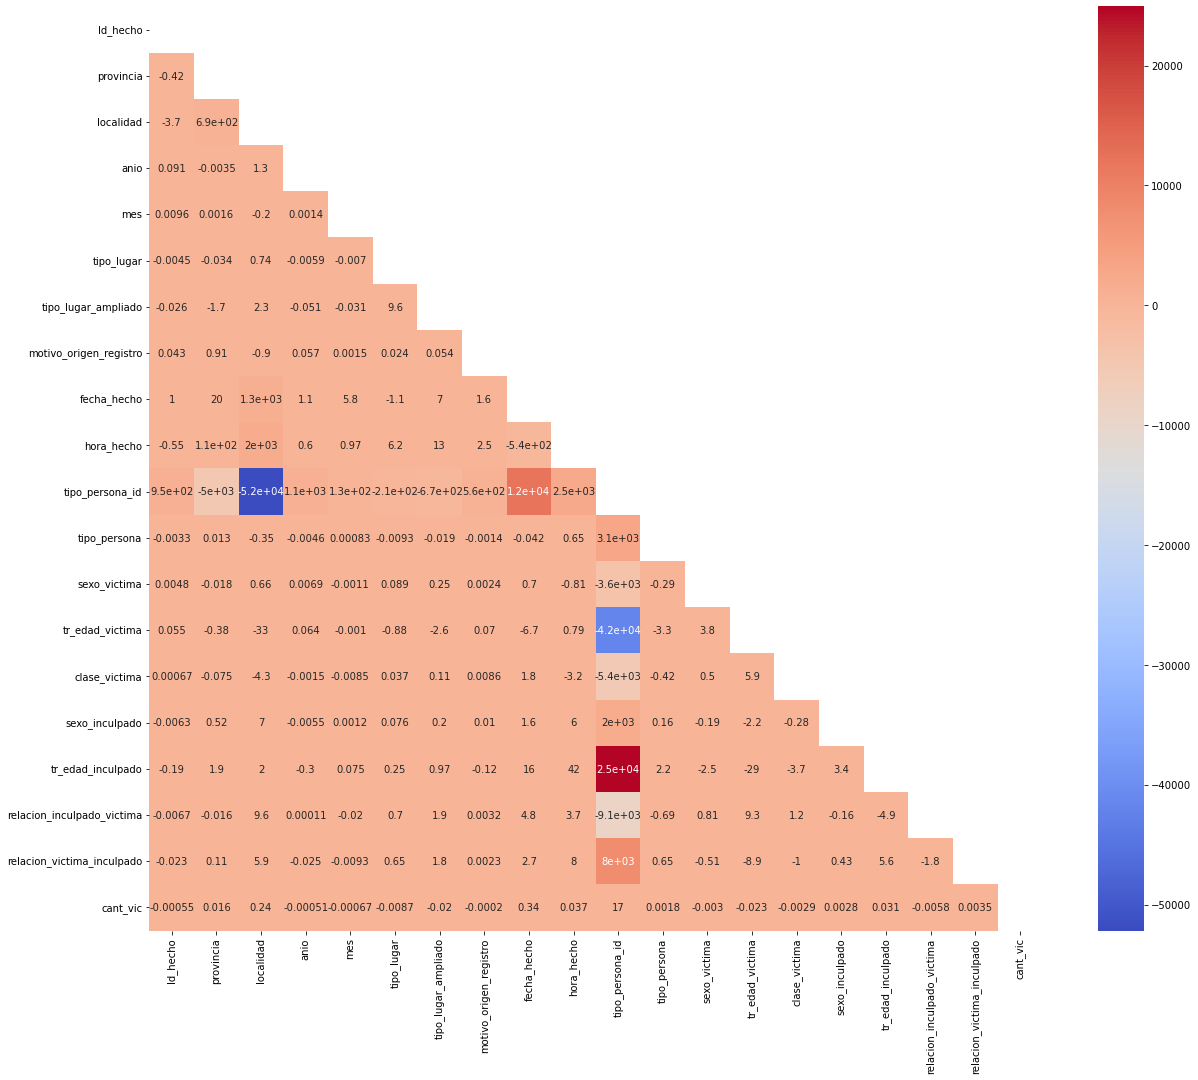

In [52]:
mask = np.triu(np.ones_like(matriz_cov, dtype=bool))
# Crear el mapa de calor con la mitad de la matriz
plt.figure(figsize=(20, 17))  # Ajusta los valores según tus necesidades
sns.heatmap(matriz_cov, mask=mask, annot=True, cmap='coolwarm')
plt.show()

### Matriz de correlacion

In [ ]:
matriz_corr = datos_escalados.corr()

In [53]:
matriz_corr

Id_hecho  provincia  localidad      anio  \
Id_hecho                    1.000000  -0.179553  -0.056816  0.944395   
provincia                  -0.179553   1.000000   0.338330 -0.001178   
localidad                  -0.056816   0.338330   1.000000  0.015590   
anio                        0.944395  -0.001178   0.015590  1.000000   
mes                         0.107998   0.000576  -0.002581  0.012379   
tipo_lugar                 -0.008629  -0.002167   0.001660 -0.009061   
tipo_lugar_ampliado        -0.017102  -0.037297   0.001782 -0.026385   
motivo_origen_registro      0.303478   0.206148  -0.007312  0.315997   
fecha_hecho                 0.006937   0.004407   0.010619  0.006041   
hora_hecho                 -0.010080   0.064400   0.042544  0.008683   
tipo_persona_id             0.472865  -0.080782  -0.030081  0.445297   
tipo_persona               -0.023918   0.003111  -0.002901 -0.026607   
sexo_victima                0.027533  -0.003345   0.004362  0.031468   
tr_edad_victima             0.027199  -0.006107  -0.018524  0.025119   
clase_victima               0.001850  -0.006712  -0.013785 -0.003275   
sexo_inculpado             -0.031595   0.084897   0.040494 -0.022069   
tr_edad_inculpado          -0.098444   0.032177   0.001166 -0.121025   
relacion_inculpado_victima -0.009632  -0.000726   0.015780  0.000130   
relacion_victima_inculpado -0.033614   0.005127   0.010182 -0.029572   
cant_vic                   -0.029401   0.027643   0.014776 -0.021659   

                                 mes  tipo_lugar  tipo_lugar_ampliado  \
Id_hecho                    0.107998   -0.008629            -0.017102   
provincia                   0.000576   -0.002167            -0.037297   
localidad                  -0.002581    0.001660             0.001782   
anio                        0.012379   -0.009061            -0.026385   
mes                         1.000000   -0.011592            -0.017354   
tipo_lugar                 -0.011592    1.000000             0.926716   
tipo_lugar_ampliado        -0.017354    0.926716             1.000000   
motivo_origen_registro      0.008846    0.024908             0.019023   
fecha_hecho                 0.033734   -0.001145             0.002418   
hora_hecho                  0.015031    0.016648             0.011863   
tipo_persona_id             0.054518   -0.015254            -0.016645   
tipo_persona                0.005152   -0.009973            -0.006854   
sexo_victima               -0.005465    0.075711             0.070604   
tr_edad_victima            -0.000420   -0.063677            -0.063054   
clase_victima              -0.020007    0.015206             0.015593   
sexo_inculpado              0.005266    0.056288             0.050627   
tr_edad_inculpado           0.032915    0.018683             0.024910   
relacion_inculpado_victima -0.024268    0.148132             0.136100   
relacion_victima_inculpado -0.011779    0.142608             0.135826   
cant_vic                   -0.030957   -0.069305            -0.054725   

                            motivo_origen_registro  fecha_hecho  hora_hecho  \
Id_hecho                                  0.303478     0.006937   -0.010080   
provincia                                 0.206148     0.004407    0.064400   
localidad                                -0.007312     0.010619    0.042544   
anio                                      0.315997     0.006041    0.008683   
mes                                       0.008846     0.033734    0.015031   
tipo_lugar                                0.024908    -0.001145    0.016648   
tipo_lugar_ampliado                       0.019023     0.002418    0.011863   
motivo_origen_registro                    1.000000     0.005853    0.024405   
fecha_hecho                               0.005853     1.000000   -0.005099   
hora_hecho                                0.024405    -0.005099    1.000000   
tipo_persona_id                           0.148800     0.003154    0.001732   
tipo_persona                     

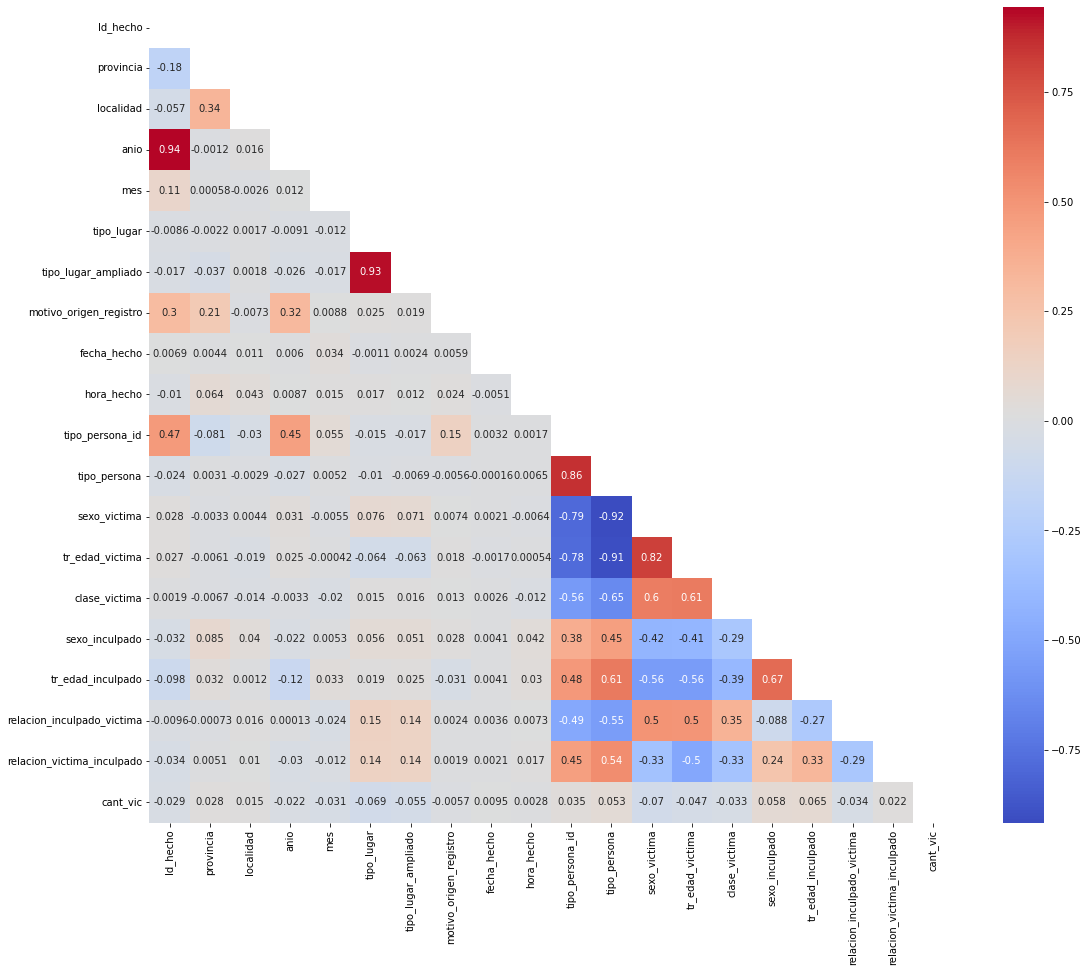

In [ ]:
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
# Crear el mapa de calor con la mitad de la matriz
plt.figure(figsize=(18, 15))  
sns.heatmap(matriz_corr, mask=mask, annot=True, cmap='coolwarm')
plt.show()

In [57]:
#Seleccion de aquellos pares de variable con relacion superior al 40%
# Establecer el umbral de correlación
umbral = 0.40 

# Filtrar los pares de columnas con correlación superior al umbral
high_correlation_pairs = []

for column in matriz_corr.columns:
    # Obtener las columnas que tienen correlación superior al umbral con 'column'
    high_correlation_columns = matriz_corr[column][abs(matriz_corr[column]) > umbral].index.tolist()
    
    # Crear pares de columnas con 'column' y las columnas de alta correlación
    pairs = [(column, col) for col in high_correlation_columns if col != column]
    
    # Agregar los pares a la lista de pares de alta correlación
    high_correlation_pairs.extend(pairs)

In [61]:
unique_pairs = []
#Compruebo que las tuplas no se encuentren repetidas con una equivalente inversa
for pair in high_correlation_pairs:
    if pair[::-1] not in unique_pairs:
        unique_pairs.append(pair)

In [62]:
unique_pairs

[('Id_hecho', 'anio'),
 ('Id_hecho', 'tipo_persona_id'),
 ('anio', 'tipo_persona_id'),
 ('tipo_lugar', 'tipo_lugar_ampliado'),
 ('tipo_persona_id', 'tipo_persona'),
 ('tipo_persona_id', 'sexo_victima'),
 ('tipo_persona_id', 'tr_edad_victima'),
 ('tipo_persona_id', 'clase_victima'),
 ('tipo_persona_id', 'tr_edad_inculpado'),
 ('tipo_persona_id', 'relacion_inculpado_victima'),
 ('tipo_persona_id', 'relacion_victima_inculpado'),
 ('tipo_persona', 'sexo_victima'),
 ('tipo_persona', 'tr_edad_victima'),
 ('tipo_persona', 'clase_victima'),
 ('tipo_persona', 'sexo_inculpado'),
 ('tipo_persona', 'tr_edad_inculpado'),
 ('tipo_persona', 'relacion_inculpado_victima'),
 ('tipo_persona', 'relacion_victima_inculpado'),
 ('sexo_victima', 'tr_edad_victima'),
 ('sexo_victima', 'clase_victima'),
 ('sexo_victima', 'sexo_inculpado'),
 ('sexo_victima', 'tr_edad_inculpado'),
 ('sexo_victima', 'relacion_inculpado_victima'),
 ('tr_edad_victima', 'clase_victima'),
 ('tr_edad_victima', 'sexo_inculpado'),
 ('tr_e

#### Nuevas preguntas o consignas en base a las altas correlaciones:

- Cantidad de hechos por año?, cuales son los 3 años con mayor numero de delitos?
- Tipo de persona que tiene mayor indice de hechos. Cual es el porcentaje de cada tipo de persona en relacion a los hechos?
- Cual es el genero que mayormente ocupa el rol de la victima?, que proporcion hay para cada sexo?
- Cual es el genero que mayormente ocupa el rol de inculpad@?, que proporcion hay para cada sexo?
- 3 principales clases de victimas y la relacion de sexo de cada una.
- Relacion entre la edad y el sexo de la victima
- Relacion entre la edad y el sexo del inculpado